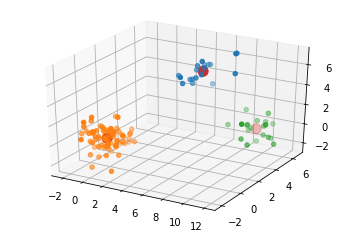

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

def kmeans(k, points):
  prev_assignment = []
  centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]
  for epoch in range(10):
    assignment = [assign(p, centroids, k) for p in points]
    centroids = compute_centroids(assignment, points, k)
    if prev_assignment == assignment:
      break
    prev_assignment = assignment
  return assignment, centroids

def assign(point, centroids, k):
  return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))

def compute_centroids(assignment, points, k):
  vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
  counts = [0] * k
  for i, p in zip(assignment, points):
    vec_sum[i] += p
    counts[i] += 1
  return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

# 데이터 생성
k = 3
points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)

# kmeans 실행
assignment, centroids = kmeans(k, points)

# 결과 확인
fig = plt.figure()
ax = fig.gca(projection='3d')
clusters = [[] for _ in range(k)]
for a, p in zip(assignment, points):
  clusters[a].append(p)
for cluster in clusters:
  ax.scatter(*zip(*cluster))
ax.scatter(*zip(*centroids), s=100)
plt.show()

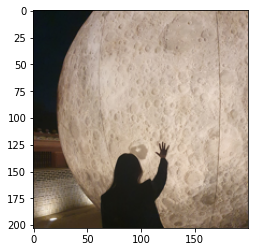

In [8]:
from PIL import Image
im = Image.open("KakaoTalk_20211120_060114012.jpg")
width = 200
height = im.height * width // im.width
im = im.resize((width, height))
plt.imshow(im)
plt.show()

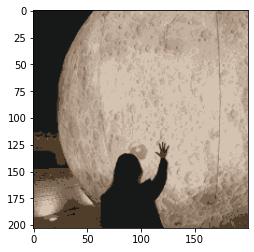

In [9]:
pixels = np.array(im).reshape(-1,3)
assignment, centroids= kmeans(10, pixels)
for a, i in zip(assignment, range(pixels.shape[0])):
  pixels[i] = centroids[a]
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()